# Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## homoscedastic uncertanties
### $\mu = 1$ and $\sigma = 0.2$

In [208]:
n_draws = 1000
sigma = 0.2
mu = 1
x_i = np.random.normal(loc=mu, scale=sigma, size=n_draws)
x = np.linspace(0, 2, 1000)

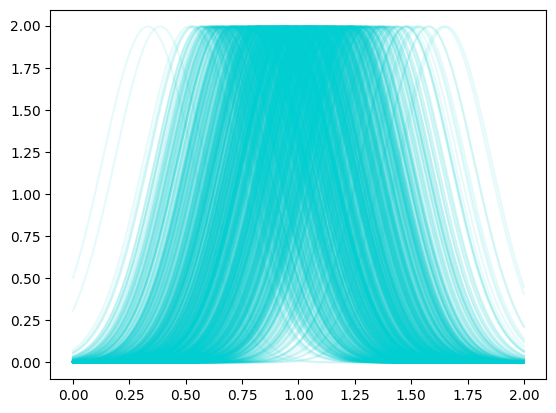

In [209]:
#initialize the two vectors to fill
product = np.ones(len(x))
sum_log = np.zeros(len(x)) 

sigma_i = sigma

for mu_i in x_i:
    p_xi = norm(mu_i, sigma_i)
    plt.plot(x, p_xi.pdf(x), c='darkturquoise', alpha=0.1)
    product = p_xi.pdf(x) * product
    sum_log = sum_log + np.log(p_xi.pdf(x))
    

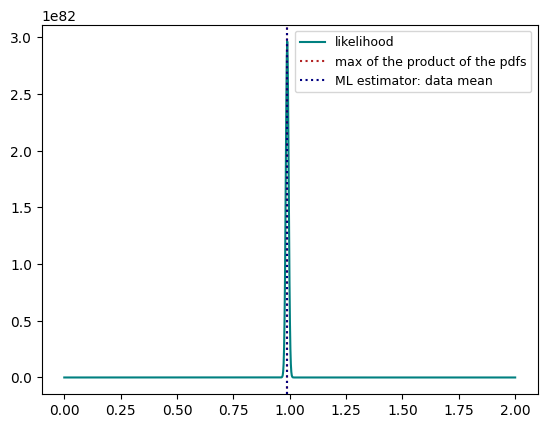

max of the likelihood:  0.988988988988989 
maximum likelihood estimator (mean of the data):  0.9889398356672948


In [210]:
plt.plot(x, product, c='teal', label='likelihood')
index_max= np.argmax(product)
x_max = x[index_max]
data_mean = np.mean(x_i)

plt.axvline(x_max,c='firebrick',ls='dotted', label='max of the product of the pdfs')
plt.axvline(data_mean,c='navy',ls='dotted', label='ML estimator: data mean')

plt.legend(fontsize = 9)     
plt.show()
data_mean = np.mean(x_i)
print("max of the likelihood: ", x_max, "\nmaximum likelihood estimator (mean of the data): ", data_mean) 

0.988988988988989


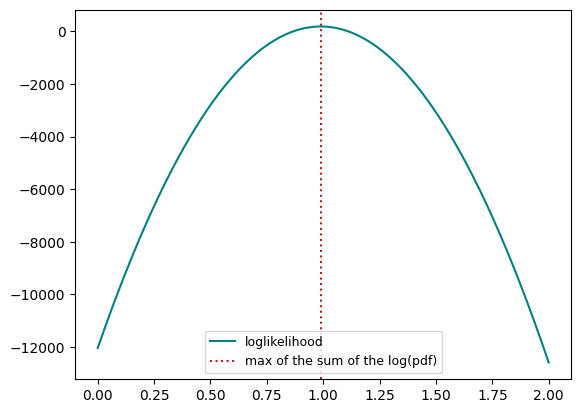

In [211]:
likelihood = np.exp(sum_log)
plt.plot(x, sum_log, c='teal', label= 'loglikelihood') #label=r'$\mu=5,\ \sigma=1$'
index_max_sum = np.argmax(likelihood)
x_max_sum= x[index_max_sum]
print(x_max)
plt.axvline(x_max_sum,c='firebrick',ls='dotted', label='max of the sum of the log(pdf)')

plt.legend(fontsize = 9)
plt.show()

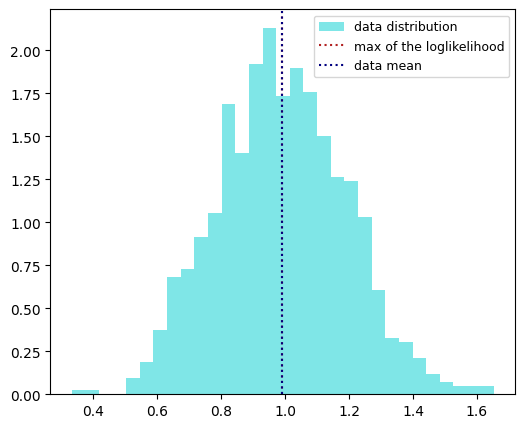

In [212]:
plt.figure(figsize=(6,5))
plt.hist(x_i, int(np.sqrt(len(x_i))), color='darkturquoise', alpha=0.5, density=True, label='data distribution')
plt.axvline(x_max, color ='firebrick',ls='dotted', label='max of the loglikelihood')
plt.axvline(data_mean,c='navy',ls='dotted', label='data mean')

plt.legend(fontsize = 9)
plt.show()

### let's check the fisher matrix

In [213]:
# the error given by the Fisher matrix is the inverse of what we get on the diagonal of the matrix

sigma_mu = 1 / np.sqrt(-1 * np.diff(sum_log, n=2) / ((x[1]-x[0])**2))[index_max]
print("error on mu from fisher information matrix: ", sigma_mu)


#while the error on Ml estimator (in case of gaussian likelihood) is 1/sqrt(n)
sigma_mu_ML_estimator= sigma/np.sqrt(n_draws)

print("error on ML estimator: ", sigma_mu_ML_estimator)

error on mu from fisher information matrix:  0.006324555320316985
error on ML estimator:  0.006324555320336759


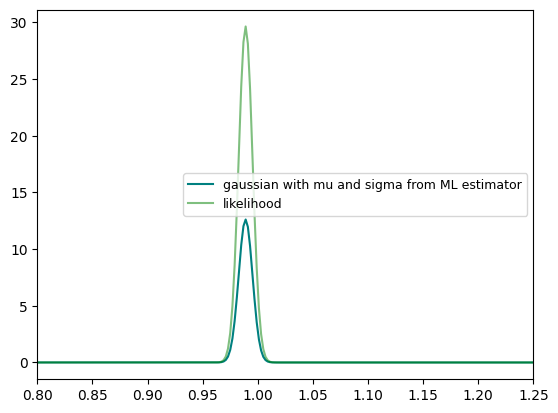

In [217]:
#gaussian with mu and this sigma as the scale
gaussian = norm(data_mean, sigma_mu_ML_estimator)

plt.plot(x, gaussian.pdf(x)*0.2, c='teal', label='gaussian with mu and sigma from ML estimator')
plt.plot(x, product * 10**(-81), c='green',alpha= 0.5, label='likelihood')
plt.xlim(0.8, 1.25)
plt.legend(fontsize = 9)


## let's now use heteroscedastic errors:

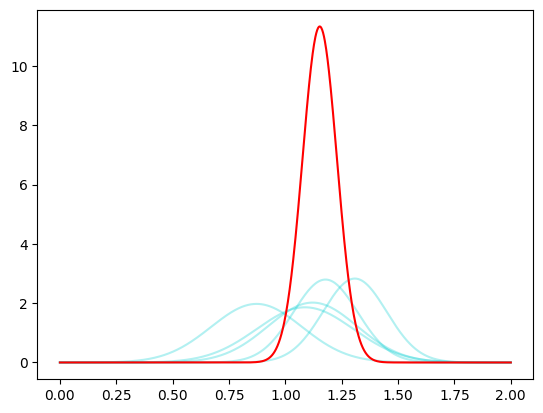

In [220]:
n_draws = 5
sigma_i = norm(0.2,0.05).rvs(n_draws)
mu_i = np.concatenate([norm(mu,s).rvs(1) for s in sigma_i])   # I'm not sure that the sigma of how I create the data should be different for each point....
mu = 1
x = np.linspace(0, 2, 1000)



#initialize the two vectors to fill
product = np.ones(len(x))
sum_log = np.zeros(len(x)) 

for i in range(n_draws):
    p_xi = norm(mu_i[i], sigma_i[i])
    plt.plot(x, p_xi.pdf(x), c='darkturquoise', alpha=0.3)
    product = p_xi.pdf(x) * product
    sum_log = sum_log + np.log(p_xi.pdf(x))
    
plt.plot(x, product, c='red', label='likelihood')


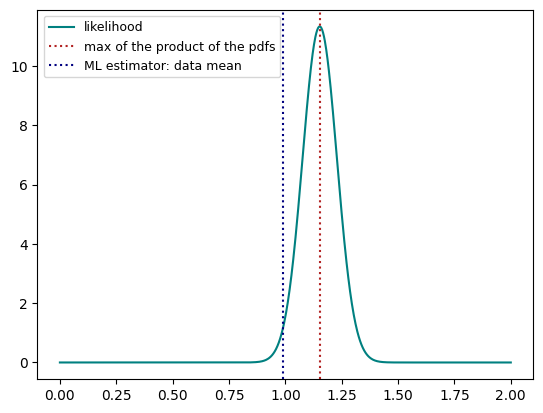

max of the likelihood:  1.1531531531531531 
maximum likelihood estimator (mean of the data):  0.9889398356672948


In [221]:
plt.plot(x, product, c='teal', label='likelihood')
index_max= np.argmax(product)
x_max = x[index_max]
data_mean = np.mean(x_i)

plt.axvline(x_max,c='firebrick',ls='dotted', label='max of the product of the pdfs')
plt.axvline(data_mean,c='navy',ls='dotted', label='ML estimator: data mean')

plt.legend(fontsize = 9)     
plt.show()
data_mean = np.mean(x_i)
print("max of the likelihood: ", x_max, "\nmaximum likelihood estimator (mean of the data): ", data_mean) 

1.1531531531531531


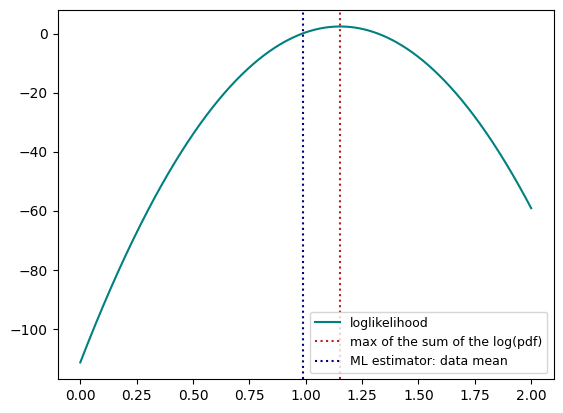

In [222]:
likelihood = np.exp(sum_log)
plt.plot(x, sum_log, c='teal', label= 'loglikelihood') #label=r'$\mu=5,\ \sigma=1$'
index_max_sum = np.argmax(likelihood)
x_max_sum= x[index_max_sum]
print(x_max)
plt.axvline(x_max_sum,c='firebrick',ls='dotted', label='max of the sum of the log(pdf)')
plt.axvline(data_mean,c='navy',ls='dotted', label='ML estimator: data mean')


plt.legend(fontsize = 9)
plt.show()

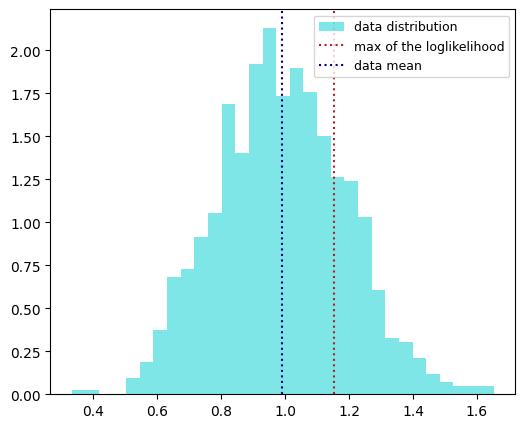

In [223]:
plt.figure(figsize=(6,5))
plt.hist(x_i, int(np.sqrt(len(x_i))), color='darkturquoise', alpha=0.5, density=True, label='data distribution')
plt.axvline(x_max, color ='firebrick',ls='dotted', label='max of the loglikelihood')
plt.axvline(data_mean,c='navy',ls='dotted', label='data mean')

plt.legend(fontsize = 9)
plt.show()

error on mu from fisher information matrix:  0.07636699112326611
error on ML estimator:  0.08944271909999159


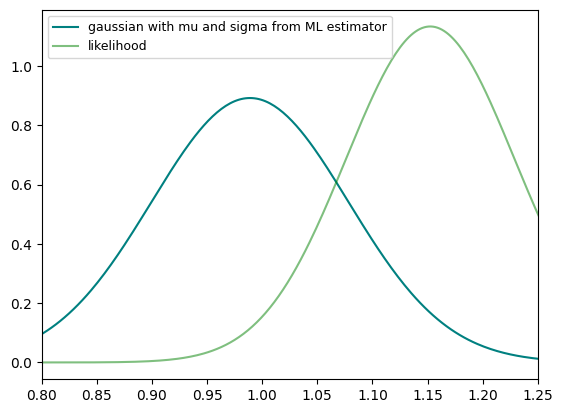

In [228]:
# the error given by the Fisher matrix is the inverse of what we get on the diagonal of the matrix

sigma_mu = 1 / np.sqrt(-1 * np.diff(sum_log, n=2) / ((x[1]-x[0])**2))[index_max]
print("error on mu from fisher information matrix: ", sigma_mu)


#while the error on Ml estimator (in case of gaussian likelihood) is 1/sqrt(n)
sigma_mu_ML_estimator= sigma/np.sqrt(n_draws)

print("error on ML estimator: ", sigma_mu_ML_estimator)


#gaussian with mu and this sigma as the scale
gaussian = norm(data_mean, sigma_mu_ML_estimator)

plt.plot(x, gaussian.pdf(x)*0.2, c='teal', label='gaussian with mu and sigma from ML estimator')
plt.plot(x, product * 10**(-1), c='green',alpha= 0.5, label='likelihood')
plt.xlim(0.8, 1.25)
plt.legend(fontsize = 9)
